In [2]:
!pip install -q oauth2client==1.5.2
import sys
sys.path.append("./utils/student_function/")
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from mooclib import *
import inspect, urllib
html, auth_code, userinfo = google_authenticate(PORT_NUMBER=8080)
html

CLICK ON THIS LINK TO AUTHENTICATE WITH YOUR GMAIL ACCOUNT
https://accounts.google.com/o/oauth2/auth?client_id=486275613361-7nk9ktukfcfjevfoe3tamjp0pmbjmprs.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080&scope=profile+email&access_type=offline&response_type=code
waiting for authentication ...
authentication succeeded


,sebastian.ruiz8@udea.edu.coSEBASTIAN RUIZ PALACIOgoogle id: 114687344014261575746authorization code: 4/qgGHjxSm6dnMdHcIyRnP8n3NI-qa1dXdRoh-0dZn_jsqzpFpM4wzzWaHtdTTmD2HQ99df7Xd53eJxUqcaSBbHVg


## Ejercicio 1

crea el constructor de un grafo que se representa como una lista de nodos conectados para cada nodo. Por ejemplo:

    g1 = st.Graph(num_nodes=4, edge_list=[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3), (2,1)])
    print g1.nodes

    > {0: [1, 2, 3], 1: [0, 2, 3], 2: [0, 1, 3], 3: [0, 1, 2]}
    
o también en el caso de un grafo dirigido:

    g1 = st.Graph(num_nodes=4, edge_list=[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3), (2,1)], is_directed=True)
    print g1.nodes
    
    > {0: [1, 2, 3], 1: [2, 3], 2: [1, 3]}

observa que, 

- si tenemos un grafo dirigido y el lado $(V_i, V_j)$, entonces $i$ ha de estar en la lista de nodos de $j$ y viceversa.
- en cambio, con un grafo dirigido, sólo $i$ ha de estar en la lista de nodos de $j$.
- la lista de nodos conectados con cada nodo ha de quedar **compacta**, no puede haber nodos repetidos. P.ej. si en la lista de lados se encuentran ambos (5,1) y (1,5), o hay lados repetidos.
- igualmente, puede haber nodos con su lista asociada vacía, es decir, que un grafo puede tener nodos que no están conectados con ningún otro nodo, pero son parte del grafo como cualquier otro nodo.

In [3]:
%%writefile ./utils/student_function/PS08_01.py
import numpy as np
class Graph:
    
    def __init__(self, num_nodes, edge_list, is_directed=False):
        
        assert type(edge_list)==list, "edge_list must be a list of tuples"
        assert type(num_nodes)==int, "num_nodes must be an int"
        
        for t in edge_list:
            assert len(t)==2, "edge_list must be a list of tuples"
            assert t[0]<num_nodes and t[0]>=0 and t[1]<num_nodes and t[1]>=0, "edge number not allowed " + str(t)
        
        self.is_directed = is_directed
        self.num_nodes   = num_nodes
        self.nodes = {}
        
        #Creo diccionario con listas vacias
        for i in range(num_nodes):
            self.nodes[i] = []
            
        #lleno el diccionario 
        for i,j in edge_list:
            if(is_directed == True):
                self.nodes[i].append(j)
            else:
                self.nodes[i].append(j)
                self.nodes[j].append(i)
                
        #Eliminar Repetidos
        for i in range (num_nodes):
            self.nodes[i] = list(dict.fromkeys(self.nodes[i]))  

Overwriting ./utils/student_function/PS08_01.py


prueba tu código

In [11]:
import PS08_01 as st
import importlib
importlib.reload(st)
g1 = st.Graph(4, [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3), (2,1)])
print(g1.nodes)

{0: [1, 2, 3], 1: [0, 2, 3], 2: [0, 1, 3], 3: [0, 1, 2]}


In [12]:
g1 = st.Graph(4, [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3), (2,1)], is_directed=True)
print(g1.nodes)

{0: [1, 2, 3], 1: [2, 3], 2: [3, 1], 3: []}


#### comprueba tu código con el corrector automático

In [13]:
!./run CHECK_SOLUTION PS08_01


** CORRECTO **
evaluation result 5.0


#### registra tu solución en línea

In [14]:
!./run SUBMIT_SOLUTION PS08_01

connecting ... registering submission for sebastian.ruiz8@udea.edu.co ...
no config found for section PS08, allowing all submissions
your submissions sheet is https://docs.google.com/spreadsheets/d/1WaK6Gr9sKYog5B6r3UnFKCNRUOte1AwPbjkDQg5r3kI

** CORRECTO **
----
evaluation result 5.0 , submission registered


## Ejercicio 2

completa el método `as_nx` para crear el grafo de `networkx` correspondiente. Revisa la documentación de `networkx.Graph` y de `networkx.DiGraph`. Ten en cuenta que:

- la clase para grafos no dirigidos es `networkx.Graph`
- la clase para grados dirigidos es `networkx.DiGraph`
- en cualquiera de los dos casos el método para añadir nodos es `add_nodes_from`
- en cualquiera de los dos casos el método para añadir lados es `add_edge`

Una vez hayas implementado tu método, puedes usar `draw` para visualizar el grafo.

In [6]:
%%writefile ./utils/student_function/PS08_02.py
import numpy as np
import networkx as nx

class Graph:
    def __init__(self, num_nodes, edge_list, is_directed=False):
        assert type(edge_list)==list, "edge_list must be a list of tuples"
        assert type(num_nodes)==int, "num_nodes must be an int"
        
        for t in edge_list:
            assert len(t)==2, "edge_list must be a list of tuples"
            assert t[0]<num_nodes and t[0]>=0 and t[1]<num_nodes and t[1]>=0, "edge number not allowed " + str(t)
        
        self.is_directed = is_directed
        self.num_nodes   = num_nodes
        self.nodes = d = {i:[] for i in range(num_nodes)}
             
        for i,j in edge_list:
            if not j in d[i]: d[i].append(j)
            if not is_directed:
                if not i in d[j]: d[j].append(i)
            

        for i in d.values(): i.sort()
                
    def as_nx(self):
        g = nx.DiGraph() if self.is_directed else nx.Graph()
        g.add_nodes_from(self.nodes)
        for i in self.nodes.keys():
            for j in self.nodes[i]:
                g.add_edge(i,j)
        
        return g
    
    def draw(self):
        ng = self.as_nx()
        nx.drawing.draw(ng, arrows=self.is_directed, with_labels=True, 
                        node_alpha=.2, node_color="blue", 
                        node_size=900, font_color="white")

Overwriting ./utils/student_function/PS08_02.py


prueba tu código

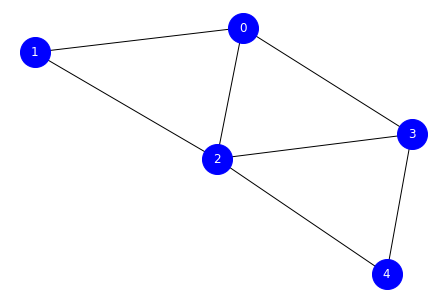

In [7]:
import PS08_02 as st
import importlib
importlib.reload(st)
import matplotlib.pyplot as plt
%matplotlib inline

g1 = st.Graph(5, [(0, 1), (0, 2), (0, 3), (1, 2), (2, 3), (2,4), (3,4)])
g1.draw()

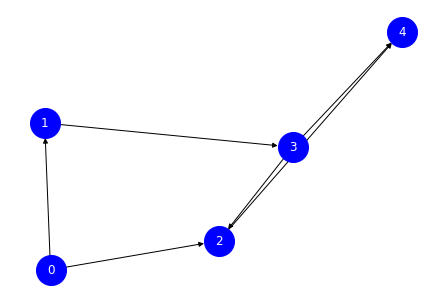

In [8]:
g2 = st.Graph(5, [(0,1), (0,2), (1,3), (2,4), (3,4), (3,2)], is_directed=True)
g2.draw()

In [9]:
!./run CHECK_SOLUTION PS08_02


** CORRECTO **
evaluation result 5.0


#### registra tu solución en línea

In [10]:
!./run SUBMIT_SOLUTION PS08_02

connecting ... registering submission for sebastian.ruiz8@udea.edu.co ...
no config found for section PS08, allowing all submissions
your submissions sheet is https://docs.google.com/spreadsheets/d/1WaK6Gr9sKYog5B6r3UnFKCNRUOte1AwPbjkDQg5r3kI

** CORRECTO **
----
evaluation result 5.0 , submission registered


## Ejercicio 3

implementa los métodos indicados para tu clase con la implementación del grafo como un diccionario de listas de nodos conectados.

In [6]:
%%writefile ./utils/student_function/PS08_03.py
import numpy as np
import networkx as nx
class Graph():

    def __init__(self, num_nodes, edge_list, is_directed=False):
        assert type(edge_list)==list, "edge_list must be a list of tuples"
        assert type(num_nodes)==int, "num_nodes must be an int"
        
        for t in edge_list:
            assert len(t)==2, "edge_list must be a list of tuples"
            assert t[0]<num_nodes and t[0]>=0 and t[1]<num_nodes and t[1]>=0, "edge number not allowed " + str(t)
        
        self.is_directed = is_directed
        self.num_nodes   = num_nodes
        self.nodes = d = {i:[] for i in range(num_nodes)}
             
        for i,j in edge_list:
            if not j in d[i]: d[i].append(j)
            if not is_directed:
                if not i in d[j]: d[j].append(i)
            

        for i in d.values(): i.sort()
            
    def as_nx(self):
        g = nx.DiGraph() if self.is_directed else nx.Graph()
        g.add_nodes_from(self.nodes)
        for i in self.nodes.keys():
            for j in self.nodes[i]:
                g.add_edge(i,j)
        
        return g
    
    def draw(self):
        ng = self.as_nx()
        nx.drawing.draw(ng, arrows=self.is_directed, with_labels=True, 
                        node_alpha=.2, node_color="blue", 
                        node_size=900, font_color="white")
                
    def assert_valid_node_number(self, n):
        assert n>=0 and n<self.num_nodes, "invalid node number: %d"%n        
    
    def grade(self, node_number):
        self.assert_valid_node_number(node_number)
        return len(self.nodes[node_number]) if not self.is_directed else self.grade_in(node_number) + self.grade_out(node_number)
    
    def grade_out(self, node_number):
        assert self.is_directed, "only directed graphs have in/out grades"
        self.assert_valid_node_number(node_number)
        
        return len(self.nodes[node_number])

    def grade_in(self, node_number):
        assert self.is_directed, "only directed graphs have in/out grades"
        self.assert_valid_node_number(node_number)
        grade_in = 0
        for i in self.nodes.values():
            if node_number in i: grade_in += 1
   
        return grade_in

    def are_adyacent(self, node_number_1, node_number_2):
        self.assert_valid_node_number(node_number_1)
        self.assert_valid_node_number(node_number_2)
        
        return True if node_number_2 in self.nodes[node_number_1] or node_number_1 in self.nodes[node_number_2] else False
        
    def is_valid_trayectory(self, trayectory):
        assert type(trayectory)==list, "trayectory must be a list"
        
        for i in range(len(trayectory)-1):
            if not self.is_directed and not self.are_adyacent(trayectory[i],trayectory[i+1]):
                return False
            elif not trayectory[i+1] in self.nodes[trayectory[i]]:
                return False
            
        return True
    

Overwriting ./utils/student_function/PS08_03.py


In [12]:
import PS08_03 as st
import importlib
importlib.reload(st)
g1 = st.Graph(4, [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3)])
for i in range(g1.num_nodes):
    print("node",i, ", grade =", g1.grade(i))

node 0 , grade = 2
node 1 , grade = 3
node 2 , grade = 3
node 3 , grade = 2


In [13]:
g3 = st.Graph(4, [(0,1), (1,0), (1,2), (2,0), (2,3)], is_directed=True)
for i in range(g3.num_nodes):
    print("node",i, ", grade_in =", g3.grade_in(i),", grade_out =", g3.grade_out(i), ", total grade =", g3.grade(i))

node 0 , grade_in = 2 , grade_out = 1 , total grade = 3
node 1 , grade_in = 1 , grade_out = 2 , total grade = 3
node 2 , grade_in = 1 , grade_out = 2 , total grade = 3
node 3 , grade_in = 1 , grade_out = 0 , total grade = 1


In [14]:
print(g3.are_adyacent(0,1))
print(g3.are_adyacent(3,2))
print(g3.are_adyacent(0,3))

True
True
False


In [15]:
t1 = [ 0, 1, 2, 3]
t2 = [ 0, 2, 1]
t3 = [ 2,0,1,0]
print("          trayectory    is_valid ")
for t in [t1, t2, t3]:
    print("%20s"%str(t), "%10s"%g3.is_valid_trayectory(t))

          trayectory    is_valid 
        [0, 1, 2, 3]       True
           [0, 2, 1]      False
        [2, 0, 1, 0]       True


#### comprueba tu código con el corrector automático

In [16]:
!./run CHECK_SOLUTION PS08_03


** CORRECTO **
evaluation result 5.0


#### registra tu solución en línea

In [17]:
!./run SUBMIT_SOLUTION PS08_03

connecting ... registering submission for sebastian.ruiz8@udea.edu.co ...
no config found for section PS08, allowing all submissions
your submissions sheet is https://docs.google.com/spreadsheets/d/1WaK6Gr9sKYog5B6r3UnFKCNRUOte1AwPbjkDQg5r3kI

** CORRECTO **
----
evaluation result 5.0 , submission registered


## Ejercicio 4

Realiza el constructor para que inicialice una representación como una matriz de incidencia. Asumamos que tenemos **solamente grafos NO dirigidos**, no tengas el cuenta el caso de grafos dirigidos.

Una **matric de incidencia** es una matriz de m filas y n columnas siendo:

- m = número vértices del grafo.
- n = número lados del grafo.

Lo anterior implica que debemos numerar los lados del grafo. Dicha numeración se hace aleatoriamente, o se puede hacer en secuencia con la lista de lados (edges).

Fíjate en el siguiente grafo de ejemplo y la matriz de incidencia asociada cualquier columna tiene exactamente dos elementos a 1:

    g2 = st.Graph(7, [(1,4),(0,2), (2,5),(0,1), (1,3), (2,6)])
    g2.inc_matrix
    
    > [[0 1 0 1 0 0]
    >  [1 0 0 1 1 0]
    >  [0 1 1 0 0 1]
    >  [0 0 0 0 1 0]
    >  [1 0 0 0 0 0]
    >  [0 0 1 0 0 0]
    >  [0 0 0 0 0 1]]
    

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
%%writefile ./utils/student_function/PS08_04.py
import numpy as np
class Graph:
    def __init__(self, num_nodes, edge_list):
        assert type(edge_list)==list, "edge_list must be a list of tuples"
        assert type(num_nodes)==int, "num_nodes must be an int"
        
        for t in edge_list:
            assert len(t)==2, "edge_list must be a list of tuples"
            assert t[0]<num_nodes and t[0]>=0 and t[1]<num_nodes and t[1]>=0, "edge number not allowed " + str(t)
        
        self.num_nodes  = num_nodes
        self.inc_matrix = m = np.zeros((num_nodes, len(edge_list)), dtype=int)
        
        for i in range(m.shape[1]):
            m[edge_list[i][0],i] = 1
            m[edge_list[i][1],i] = 1

Overwriting ./utils/student_function/PS08_04.py


In [8]:
import PS08_04 as st
import importlib
importlib.reload(st)
g2 = st.Graph(7, [(1,4),(0,2), (2,5),(0,1), (1,3), (2,6)])
print(g2.inc_matrix)

[[0 1 0 1 0 0]
 [1 0 0 1 1 0]
 [0 1 1 0 0 1]
 [0 0 0 0 1 0]
 [1 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 1]]


In [29]:
import numpy as np
from itertools import *
k = np.array([[0, 1, 0],
       [1, 0, 1],
       [1, 0, 0]])
print(k)
def m1(m):
    r = np.copy(m)
    for i,j in itertools.product(range(m.shape[0]),range(m.shape[1])):
        r[i,j] = m[j,i]
    return print(r)

m1(k)

[[0 1 0]
 [1 0 1]
 [1 0 0]]
[[0 1 1]
 [1 0 0]
 [0 1 0]]


#### comprueba tu código con el corrector automático

In [21]:
!./run CHECK_SOLUTION PS08_04


** CORRECTO **
evaluation result 5.0


#### registra tu solución en línea

In [22]:
!./run SUBMIT_SOLUTION PS08_04

connecting ... registering submission for sebastian.ruiz8@udea.edu.co ...
no config found for section PS08, allowing all submissions
your submissions sheet is https://docs.google.com/spreadsheets/d/1WaK6Gr9sKYog5B6r3UnFKCNRUOte1AwPbjkDQg5r3kI

** CORRECTO **
----
evaluation result 5.0 , submission registered


## Ejercicio 5

implementa los métodos siguientes para la clase anterior con matrices de incidencia:

- `grade`
- `are_adyacent`
- `is_valid_trayectory`

In [4]:
%%writefile ./utils/student_function/PS08_05.py
import numpy as np
class Graph:
    def __init__(self, num_nodes, edge_list):
        assert type(edge_list)==list, "edge_list must be a list of tuples"
        assert type(num_nodes)==int, "num_nodes must be an int"
        
        for t in edge_list:
            assert len(t)==2, "edge_list must be a list of tuples"
            assert t[0]<num_nodes and t[0]>=0 and t[1]<num_nodes and t[1]>=0, "edge number not allowed " + str(t)
        
        self.num_nodes  = num_nodes
        self.inc_matrix = m = np.zeros((num_nodes, len(edge_list)), dtype=int)
        
        for i in range(m.shape[1]):
            m[edge_list[i][0],i] = 1
            m[edge_list[i][1],i] = 1
    
    def assert_valid_node_number(self, n):
        assert n>=0 and n<self.num_nodes, "invalid node number: %d"%n        
    
    def grade(self, node_number):
        self.assert_valid_node_number(node_number)
        return sum(self.inc_matrix[node_number])
    
    def are_adyacent(self, node_number_1, node_number_2):
        self.assert_valid_node_number(node_number_1)
        self.assert_valid_node_number(node_number_2)
        
        return True if max(self.inc_matrix[node_number_1] + self.inc_matrix[node_number_2]) == 2 else False
        
    def is_valid_trayectory(self, trayectory):
        assert type(trayectory)==list, "trayectory must be a list"
        for i in range(len(trayectory)-1):
            if not self.are_adyacent(trayectory[i],trayectory[i+1]):
                return False
        return True

Overwriting ./utils/student_function/PS08_05.py


In [24]:
import PS08_05 as st
import importlib
importlib.reload(st)
g1 = st.Graph(4, [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3)])
for i in range(g1.num_nodes):
    print("node",i, ", grade =", g1.grade(i))

node 0 , grade = 2
node 1 , grade = 3
node 2 , grade = 3
node 3 , grade = 2


In [25]:
print(g3.are_adyacent(0,1))
print(g3.are_adyacent(3,2))
print(g3.are_adyacent(0,3))

True
True
False


In [26]:
g3 = st.Graph(4, [(0,1), (1,0), (1,2), (2,0), (2,3)])
t1 = [ 0, 1, 2, 3]
t2 = [ 0, 2, 3,1]
t3 = [ 2,0,1,0]
print("          trayectory    is_valid ")
for t in [t1, t2, t3]:
    print("%20s"%str(t), "%10s"%g3.is_valid_trayectory(t))

          trayectory    is_valid 
        [0, 1, 2, 3]       True
        [0, 2, 3, 1]      False
        [2, 0, 1, 0]       True


#### comprueba tu código con el corrector automático

In [27]:
!./run CHECK_SOLUTION PS08_05


** CORRECTO **
evaluation result 5.0


#### registra tu solución en línea

In [28]:
!./run SUBMIT_SOLUTION PS08_05

connecting ... registering submission for sebastian.ruiz8@udea.edu.co ...
no config found for section PS08, allowing all submissions
your submissions sheet is https://docs.google.com/spreadsheets/d/1WaK6Gr9sKYog5B6r3UnFKCNRUOte1AwPbjkDQg5r3kI

** CORRECTO **
----
evaluation result 5.0 , submission registered
